In [23]:
import numpy as np

In [22]:
Xs = [] 
Ys = []
folds = []
with open('./input.txt') as file:
    while (line:=file.readline().strip()) != "":
        x, y = line.split(',')
        Xs.append(int(x))
        Ys.append(int(y))
    while (line:=file.readline().strip()) != "":
        instr = line.strip('fold along ')
        axis, pos = instr.split('=')
        folds.append((axis, int(pos)))
        

        

In [31]:
xshape = max(Xs) + 1
yshape = max(Ys) + 1
paper = np.zeros(shape=(yshape, xshape), dtype=int)

In [32]:
paper[Ys, Xs] = 1

In [91]:
folded = paper.copy()
for i, instr in enumerate(folds):
    axis, foldline = instr
    if axis=='x':
        assert folded.shape[1] == foldline * 2 + 1
        folded = folded[:, :foldline] + folded[:, foldline+1:][:, ::-1]
    else:
        assert axis=='y'
        assert folded.shape[0] == foldline * 2 + 1
        folded = folded[:foldline, :] + folded[foldline+1:, :][::-1, :]
    if i == 0:
        print(f"Part 1: {(folded>0).sum()}")
        

Part 1: 753


In [89]:
from matplotlib.pyplot import imshow

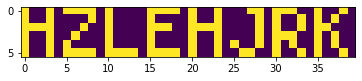

In [90]:
dots = (folded > 0).astype(int)
imshow(dots)